<a href="https://colab.research.google.com/github/NaveenKumar-Y/Machine_learning/blob/main/Bank_Marketing_Campaign_Response_Prediction/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Marketing Analytics ML Project: Bank Marketing Campaign Response Prediction
Download the zip file from "https://archive.ics.uci.edu/static/public/222/bank+marketing.zip", extract the file "bank-full.csv" from it, and load the data into a dataframe.

In [2]:
import requests
import zipfile
import io

url = "https://archive.ics.uci.edu/static/public/222/bank+marketing.zip"
response = requests.get(url)

if response.status_code == 200:
    with zipfile.ZipFile(io.BytesIO(response.content)) as outer_zip:
        try:
            with outer_zip.open("bank.zip") as inner_zip_file:
                with zipfile.ZipFile(io.BytesIO(inner_zip_file.read())) as inner_zip:
                     inner_zip.extract("bank-full.csv")
        except KeyError:
            print("bank-full.csv not found in bank.zip. Listing files in bank.zip:")
            with outer_zip.open("bank.zip") as inner_zip_file:
                with zipfile.ZipFile(io.BytesIO(inner_zip_file.read())) as inner_zip:
                    for file_info in inner_zip.infolist():
                        print(file_info.filename)
else:
    print(f"Failed to download the file. Status code: {response.status_code}")

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/bank-full.csv', sep=';')
# df = pd.read_csv("/content/drive/MyDrive/Study/ML/Datasets/bank+marketing_dataset/bank/bank-full.csv", delimiter=";")


In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
# separate numerical and categorical cols
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


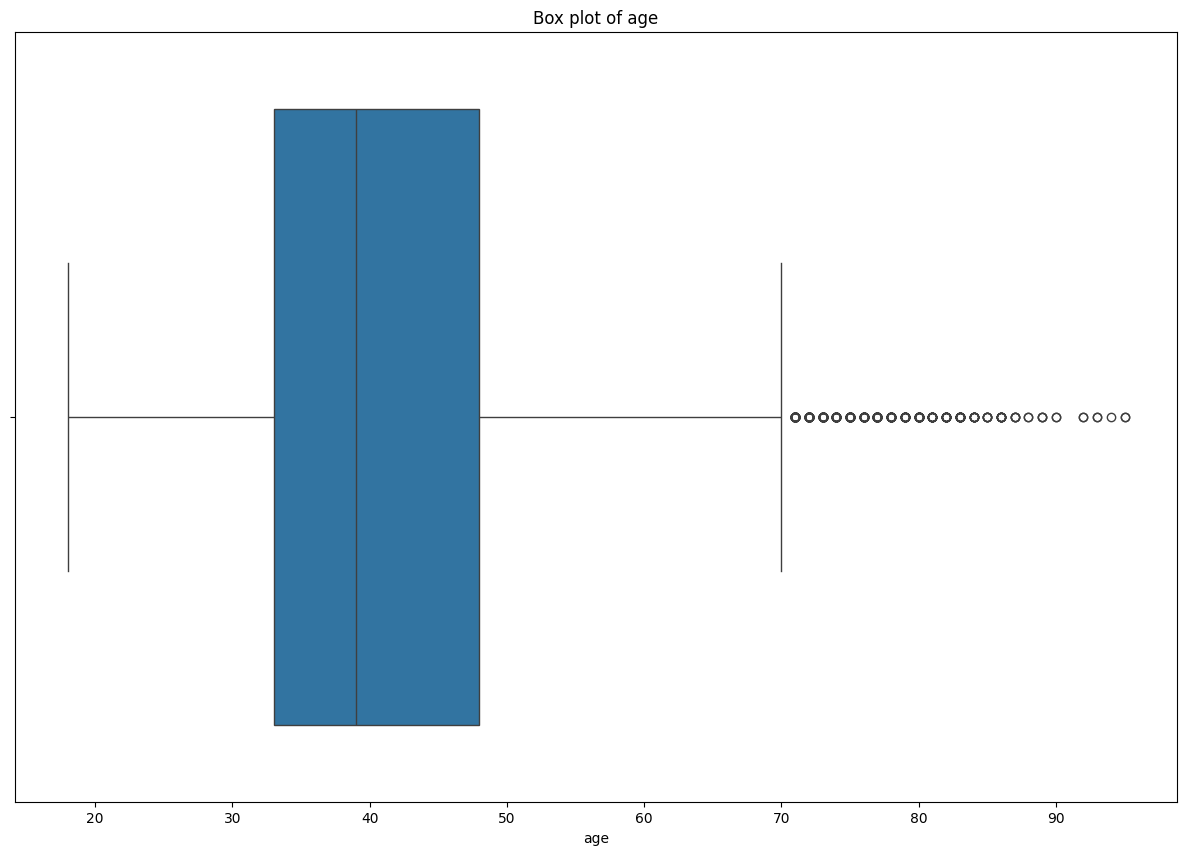

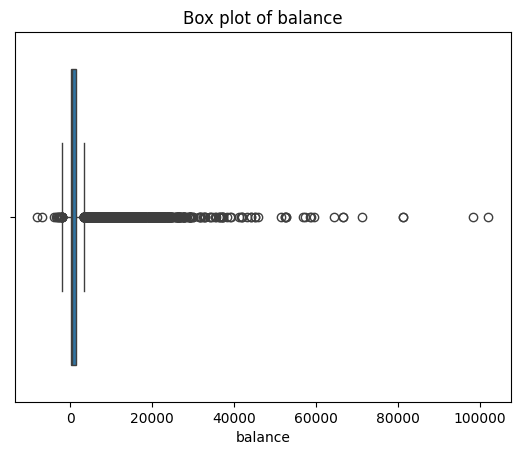

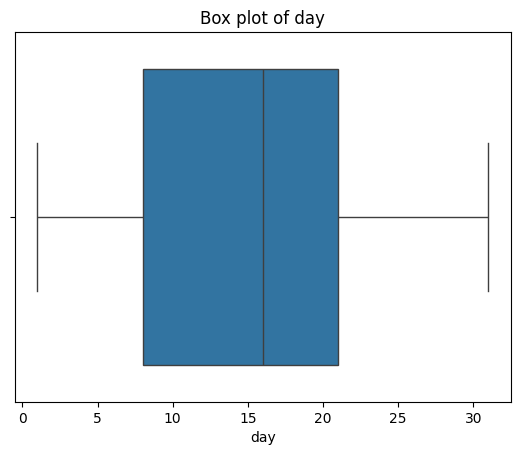

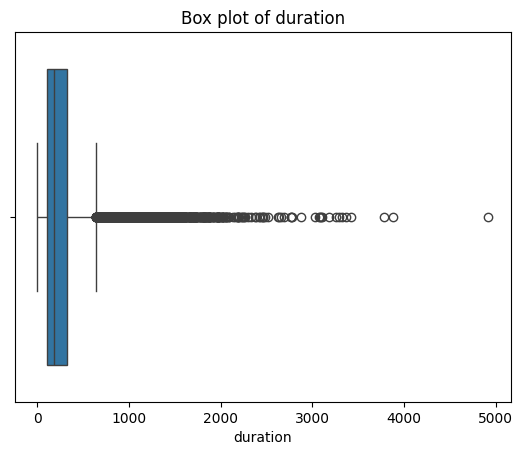

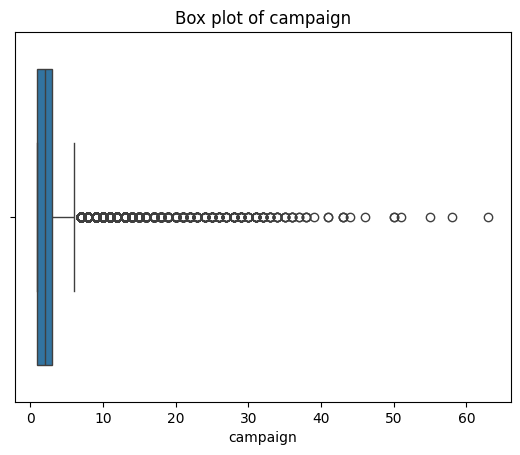

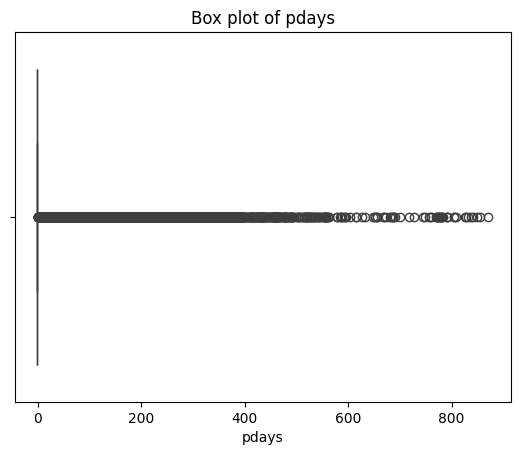

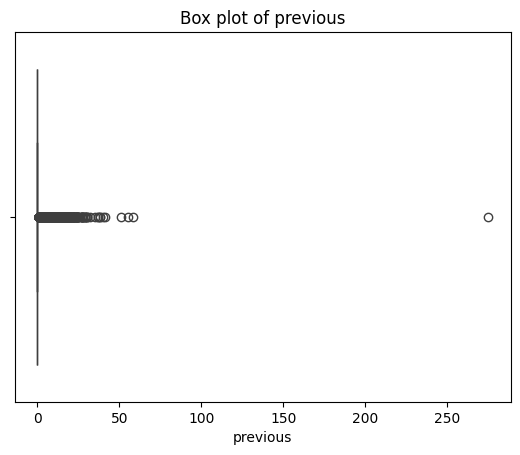

In [7]:
# check for outliers

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

# Iterate through each numerical column and create a box plot
for column in numerical_cols:
    sns.boxplot(x=df[column])
    plt.title(f'Box plot of {column}')
    plt.show()

In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
(df['duration'] > df['duration'].quantile(0.999)).sum()

np.int64(46)

In [10]:
df['duration'].quantile(0.999)

np.float64(2091.740000000049)

In [11]:
# pdays column, create a new column out of it, 1 if contacted, 0 if not.
df['Was_Contacted_Previously'] = (df['pdays'] != -1).astype(int)

In [12]:
df[['Was_Contacted_Previously','pdays']].tail()

,Was_Contacted_Previously,pdays
45206,0,-1
45207,0,-1
45208,1,184
45209,0,-1
45210,1,188


In [13]:
# Convert binary class cols to binary numbers.
df['default'].unique()

# # Map the string values to integers
df['default'] = df['default'].map({'yes': 1, 'no': 0})

In [14]:
df['housing'] = df['housing'].map({'yes': 1, 'no': 0})
df['loan'] = df['loan'].map({'yes': 1, 'no': 0})
df['y'] = df['y'].map({'yes': 1, 'no': 0})

In [15]:
df.describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,Was_Contacted_Previously
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,0.018027,1362.272058,0.555838,0.160226,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985,0.182633
std,10.618762,0.133049,3044.765829,0.496878,0.366820,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406,0.386369
min,18.000000,0.000000,-8019.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,72.000000,0.000000,0.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000000,448.000000,1.000000,0.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000,0.000000
75%,48.000000,0.000000,1428.000000,1.000000,0.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000,0.000000
max,95.000000,1.000000,102127.000000,1.000000,1.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000,1.000000


--- Skewness for 'age': 0.6848 ---


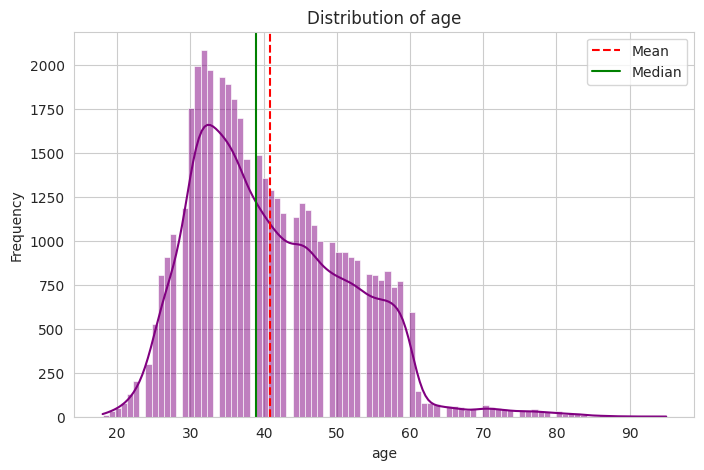

--- Skewness for 'balance': 8.3603 ---


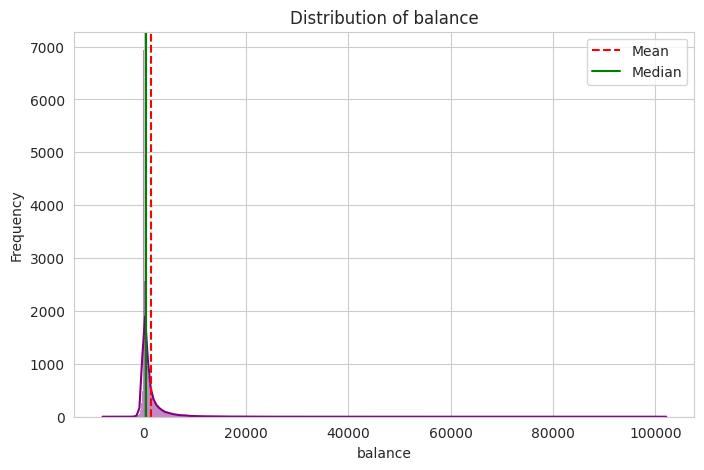

--- Skewness for 'duration': 3.1443 ---


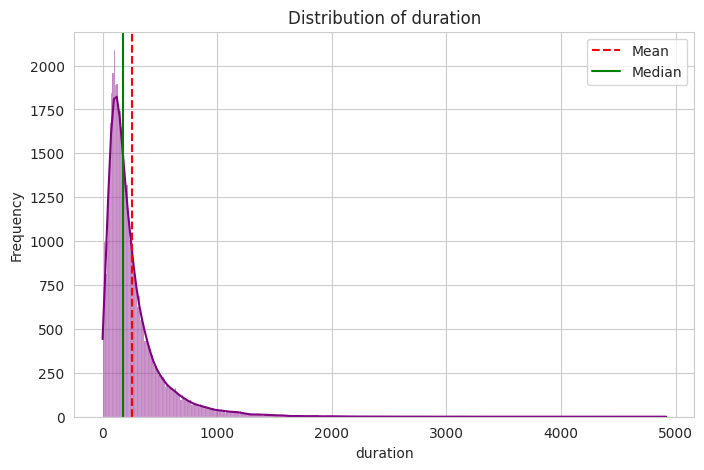

--- Skewness for 'campaign': 4.8987 ---


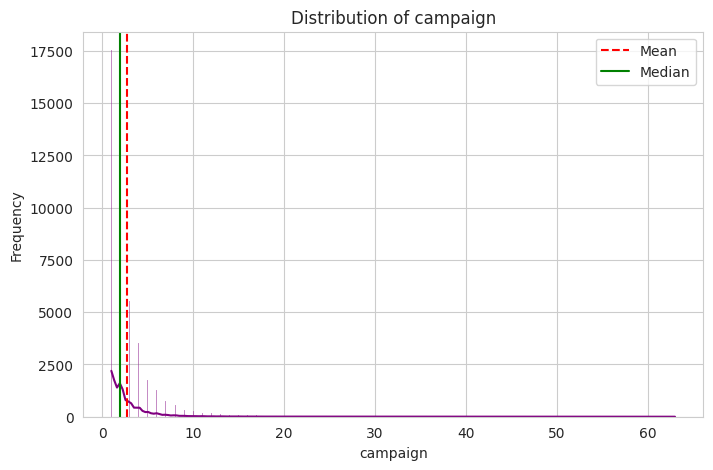

--- Skewness for 'previous': 41.8465 ---


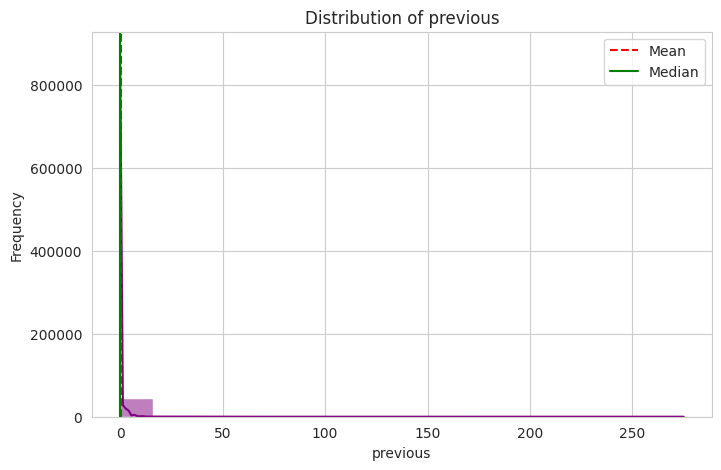

--- Skewness for 'pdays': 2.6157 ---


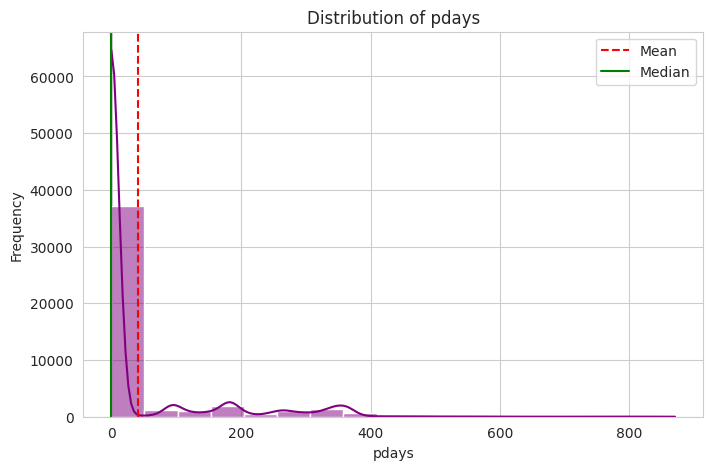

In [16]:
numerical_cols = ["age", "balance", "duration", "campaign", "previous","pdays"]

sns.set_style("whitegrid")

for col in numerical_cols:
    # Calculate and print the skewness for the current column
    skewness = df[col].skew()
    print(f"--- Skewness for '{col}': {skewness:.4f} ---")

    # Set up a figure for the current column's plot
    plt.figure(figsize=(8, 5))

    # Plot the distribution
    sns.histplot(df[col], kde=True, color='purple')

    # Add vertical lines for mean and median to visualize skew
    plt.axvline(df[col].mean(), color='r', linestyle='--', label='Mean')
    plt.axvline(df[col].median(), color='g', linestyle='-', label='Median')

    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

In [17]:
# # all the extreme values looks legitimate, not need of dealing with them, will apply log transformation to bring the values closer later

categorical_cols =  ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
# # one hot encoding for categorical values
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [18]:
pd.set_option("display.max_columns",None)
df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,Was_Contacted_Previously,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,0,0,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True
1,44,0,29,1,0,5,151,1,-1,0,0,0,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True
2,33,0,2,1,1,5,76,1,-1,0,0,0,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True
3,47,0,1506,1,0,5,92,1,-1,0,0,0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True
4,33,0,1,0,0,5,198,1,-1,0,0,0,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True


In [19]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop('y', axis=1)  # Features are all columns except 'y'
y = df['y']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # Using stratify to maintain the proportion of the target variable in both train and test sets

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (36168, 43)
Testing set shape: (9043, 43)


In [20]:
# We use sin and cos functions because they naturally map sequential numbers onto a circle. 2 * np.pi represents one full rotation,
# and dividing by 31 scales each day to its correct position on that circle.

# Sine transformation
X_train['day_sin'] = np.sin(2 * np.pi * X_train['day'] / 31)
X_test['day_sin'] = np.sin(2 * np.pi * X_test['day'] / 31)

# Cosine transformation
X_train['day_cos'] = np.cos(2 * np.pi * X_train['day'] / 31)
X_test['day_cos'] = np.cos(2 * np.pi * X_test['day'] / 31)

#  these two new columns unambiguously tell the model the exact day of the month in a cyclical context.


In [21]:
from sklearn.preprocessing import PowerTransformer
import numpy as np

# Apply Yeo-Johnson transformation to 'balance' [since it has negative values]
# yeojohnson_transformer = PowerTransformer(method='yeo-johnson')
# df['balance_YeoJohnson'] = yeojohnson_transformer.fit_transform(df[['balance']])

# Apply Yeo-Johnson transformation to 'balance' [since it has negative values]
yeojohnson_transformer = PowerTransformer(method='yeo-johnson')
X_train['balance_YeoJohnson'] = yeojohnson_transformer.fit_transform(X_train[['balance']])
X_test['balance_YeoJohnson'] = yeojohnson_transformer.transform(X_test[['balance']])

X_train.head()


,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,Was_Contacted_Previously,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,day_sin,day_cos,balance_YeoJohnson
24001,36,0,861,0,0,29,140,2,-1,0,0,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,-3.943559e-01,0.918958,-0.041595
43409,24,0,4126,0,0,5,907,4,185,7,1,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,8.486443e-01,0.528964,1.026451
20669,44,0,244,1,0,12,1735,4,-1,0,0,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,6.513725e-01,-0.758758,-0.297542
18810,48,0,0,0,0,31,35,11,-1,0,0,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,-2.449294e-16,1.000000,-0.432826
23130,38,0,257,0,0,26,57,10,-1,0,0,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,-8.486443e-01,0.528964,-0.291485


In [22]:
# Apply log1p transformation to the other highly skewed columns
# highly_skewed_cols_log = ['duration', 'campaign', 'previous']
# for col in highly_skewed_cols_log:
#     df[col + '_Log'] = np.log1p(df[col])

# Apply log1p transformation to the other highly skewed columns
highly_skewed_cols_log = ['duration', 'campaign', 'previous']
for col in highly_skewed_cols_log:
    X_train[col + '_Log'] = np.log1p(X_train[col])
    X_test[col + '_Log'] = np.log1p(X_test[col])

X_train[['duration_Log', 'duration', 'campaign_Log', 'campaign', 'previous_Log', 'previous']].tail()

,duration_Log,duration,campaign_Log,campaign,previous_Log,previous
17958,4.077537,58,1.098612,2,0.000000,0
15941,4.356709,77,1.791759,5,0.000000,0
16952,4.595120,98,0.693147,1,0.000000,0
34781,5.429346,227,0.693147,1,0.000000,0
44229,5.159055,173,1.098612,2,2.197225,8


In [23]:
# Create a new column for the transformed days, leaving non-contacted as 0
# select only the rows for customers who have been contacted before.
X_train['Days_Since_Contact_Log'] = X_train['pdays'][X_train['pdays'] != -1].apply(np.log1p)
X_test['Days_Since_Contact_Log'] = X_test['pdays'][X_test['pdays'] != -1].apply(np.log1p)
# The log transformation is then applied only to this clean slice of data.

# Days_Since_Contact_Log column has transformed numbers for the contacted customers and NaN (empty) for everyone else.
# so fill the NaN values (for non-contacted customers) with 0.
X_train['Days_Since_Contact_Log'].fillna(0, inplace=True)
X_test['Days_Since_Contact_Log'].fillna(0, inplace=True)

/tmp/ipython-input-350791685.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['Days_Since_Contact_Log'].fillna(0, inplace=True)
/tmp/ipython-input-350791685.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

--- Skewness for pdays ---
Original: 2.6163
Transformed: 1.7155



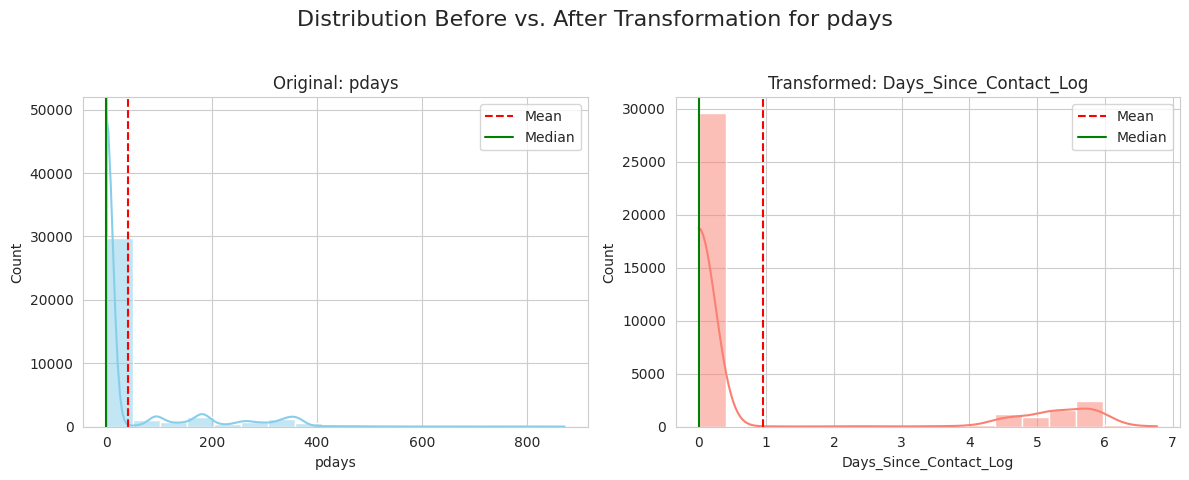

--- Skewness for duration ---
Original: 3.2109
Transformed: -0.4517



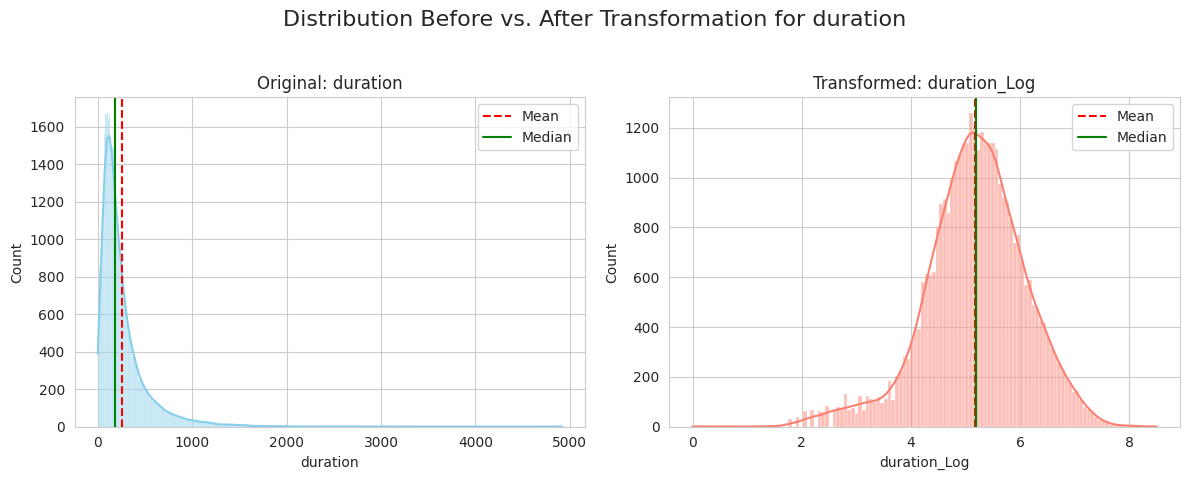

--- Skewness for campaign ---
Original: 4.9419
Transformed: 1.3280



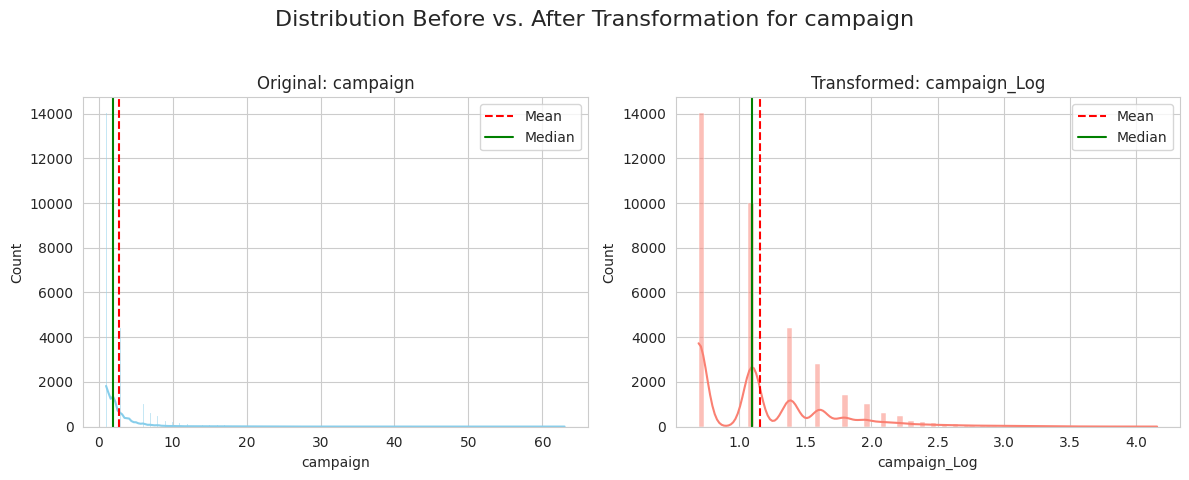

--- Skewness for previous ---
Original: 45.0344
Transformed: 2.5376



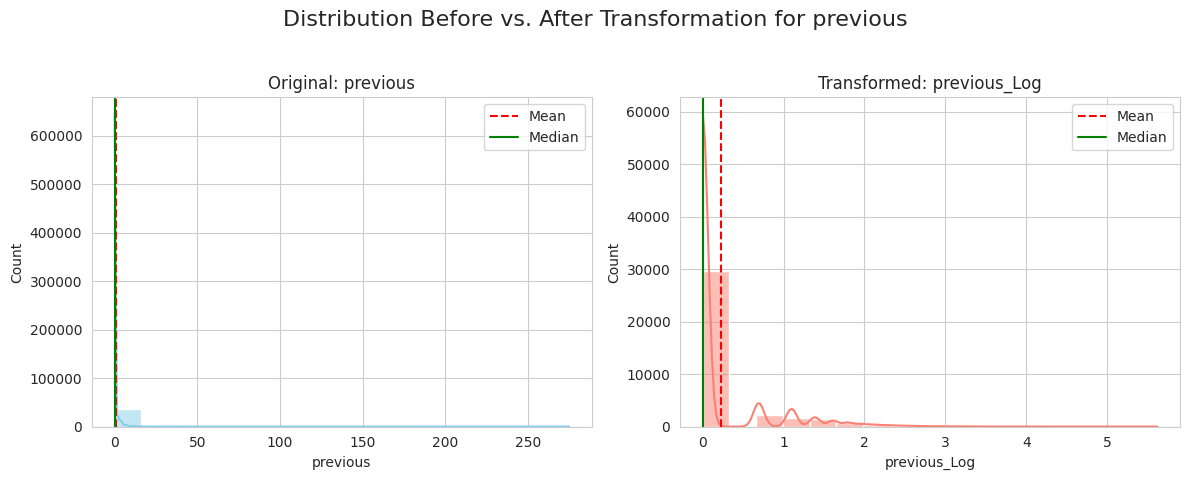

--- Skewness for balance ---
Original: 8.3402
Transformed: 0.9986



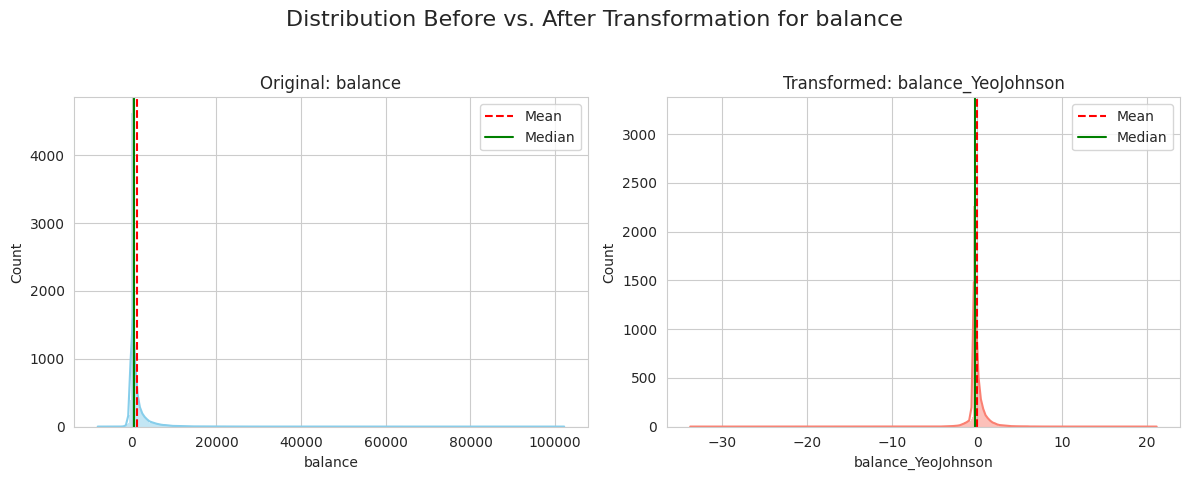

In [24]:
column_pairs = [
    ['pdays', 'Days_Since_Contact_Log'],
    ['duration', 'duration_Log'],
    ['campaign', 'campaign_Log'],
    ['previous', 'previous_Log'],
    ['balance', 'balance_YeoJohnson']
]


# --- 3. Loop and Plot ---
sns.set_style("whitegrid")

for original_col, transformed_col in column_pairs:
    # Print skewness values for the current pair
    original_skew = X_train[original_col].skew()
    transformed_skew = X_train[transformed_col].skew()
    print(f"--- Skewness for {original_col} ---")
    print(f"Original: {original_skew:.4f}")
    print(f"Transformed: {transformed_skew:.4f}\n")

    # Set up a figure for the current pair
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle(f'Distribution Before vs. After Transformation for {original_col}', fontsize=16)

    # Plot Original Data
    sns.histplot(X_train[original_col], kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Original: {original_col}')
    axes[0].axvline(X_train[original_col].mean(), color='r', linestyle='--', label='Mean')
    axes[0].axvline(X_train[original_col].median(), color='g', linestyle='-', label='Median')
    axes[0].legend()

    # Plot Transformed Data
    sns.histplot(X_train[transformed_col], kde=True, ax=axes[1], color='salmon')
    axes[1].set_title(f'Transformed: {transformed_col}')
    axes[1].axvline(X_train[transformed_col].mean(), color='r', linestyle='--', label='Mean')
    axes[1].axvline(X_train[transformed_col].median(), color='g', linestyle='-', label='Median')
    axes[1].legend()

    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for suptitle
    plt.show()

In [25]:
X_train.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,Was_Contacted_Previously,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,day_sin,day_cos,balance_YeoJohnson,duration_Log,campaign_Log,previous_Log,Days_Since_Contact_Log
24001,36,0,861,0,0,29,140,2,-1,0,0,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,-3.943559e-01,0.918958,-0.041595,4.948760,1.098612,0.000000,0.000000
43409,24,0,4126,0,0,5,907,4,185,7,1,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,8.486443e-01,0.528964,1.026451,6.811244,1.609438,2.079442,5.225747
20669,44,0,244,1,0,12,1735,4,-1,0,0,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,6.513725e-01,-0.758758,-0.297542,7.459339,1.609438,0.000000,0.000000
18810,48,0,0,0,0,31,35,11,-1,0,0,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,-2.449294e-16,1.000000,-0.432826,3.583519,2.484907,0.000000,0.000000
23130,38,0,257,0,0,26,57,10,-1,0,0,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,-8.486443e-01,0.528964,-0.291485,4.060443,2.397895,0.000000,0.000000


In [26]:
# Identify the numerical columns to scale
numerical_cols_to_scale = ['age', 'Days_Since_Contact_Log', 'balance_YeoJohnson', 'duration_Log', 'campaign_Log', 'previous_Log']

print("Numerical columns to scale:", numerical_cols_to_scale)

Numerical columns to scale: ['age', 'Days_Since_Contact_Log', 'balance_YeoJohnson', 'duration_Log', 'campaign_Log', 'previous_Log']


In [27]:
from sklearn.preprocessing import StandardScaler

# perform feature scaling
scaler = StandardScaler()
X_train[numerical_cols_to_scale] = scaler.fit_transform(X_train[numerical_cols_to_scale])
X_test[numerical_cols_to_scale] = scaler.transform(X_test[numerical_cols_to_scale])

# Drop original columns that have been transformed
X_train.drop(columns=['day','pdays', 'duration', 'campaign', 'previous', 'balance'], inplace=True)
X_test.drop(columns=['day','pdays', 'duration', 'campaign', 'previous', 'balance'], inplace=True)

In [28]:
X_train.head()


,age,default,housing,loan,Was_Contacted_Previously,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,day_sin,day_cos,balance_YeoJohnson,duration_Log,campaign_Log,previous_Log,Days_Since_Contact_Log
24001,-0.460434,0,0,0,0,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,-3.943559e-01,0.918958,-0.041595,-0.241798,-0.117143,-0.423167,-0.466498
43409,-1.589641,0,0,0,1,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,8.486443e-01,0.528964,1.026451,1.776444,0.881244,3.478737,2.087571
20669,0.292371,0,1,0,0,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,6.513725e-01,-0.758758,-0.297542,2.478738,0.881244,-0.423167,-0.466498
18810,0.668773,0,0,0,0,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,-2.449294e-16,1.000000,-0.432826,-1.721212,2.592311,-0.423167,-0.466498
23130,-0.272233,0,0,0,0,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,-8.486443e-01,0.528964,-0.291485,-1.204404,2.422251,-0.423167,-0.466498


In [29]:
X_test.head()

,age,default,housing,loan,Was_Contacted_Previously,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,day_sin,day_cos,balance_YeoJohnson,duration_Log,campaign_Log,previous_Log,Days_Since_Contact_Log
1392,-0.084032,0,1,1,0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,0.998717,-0.050649,-0.127983,0.737199,-0.117143,-0.423167,-0.466498
7518,0.292371,0,1,0,0,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,-0.201299,0.979530,-0.237150,0.158452,-0.117143,-0.423167,-0.466498
12007,-0.930937,0,1,0,0,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,-0.790776,-0.612106,-0.246791,0.283721,1.237584,-0.423167,-0.466498
5536,-0.460434,0,1,0,0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,-0.998717,-0.050649,-0.121983,-0.146230,0.881244,-0.423167,-0.466498
29816,-0.648635,0,1,0,0,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,0.724793,0.688967,0.335131,-1.132135,-0.909607,-0.423167,-0.466498


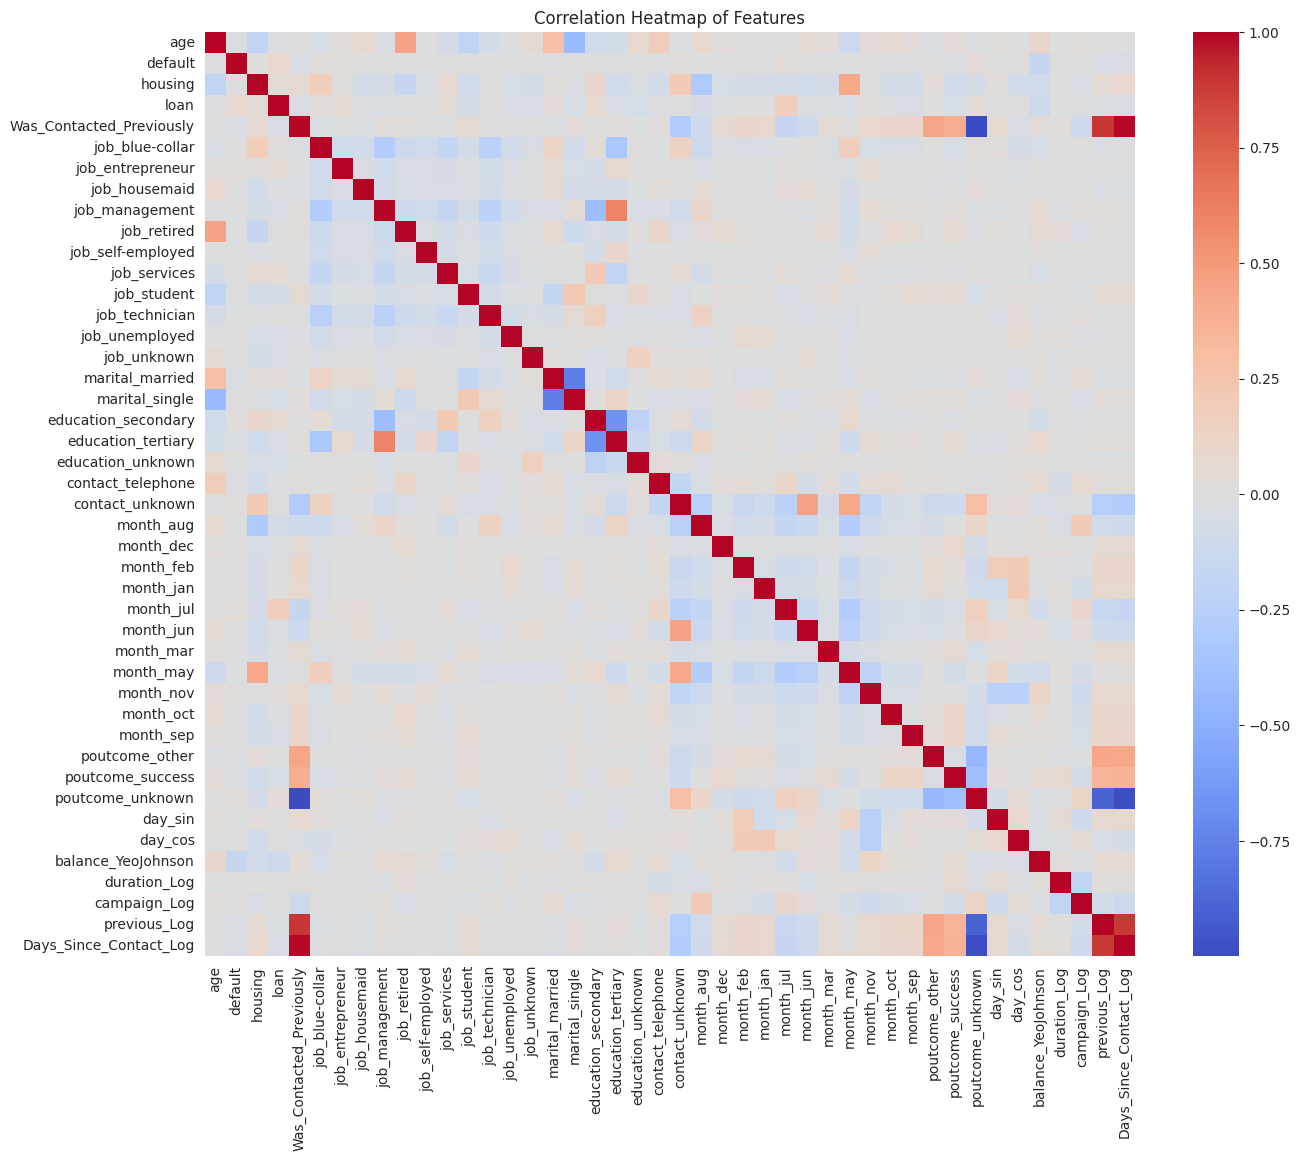

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = X_train.corr()

# Plot the heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

In [31]:
# train with logistic regression.

from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model using the training data
model.fit(X_train, y_train)

print("Logistic Regression model trained successfully!")

Logistic Regression model trained successfully!


Accuracy: 0.9024

Confusion Matrix:
[[7782  203]
 [ 680  378]]


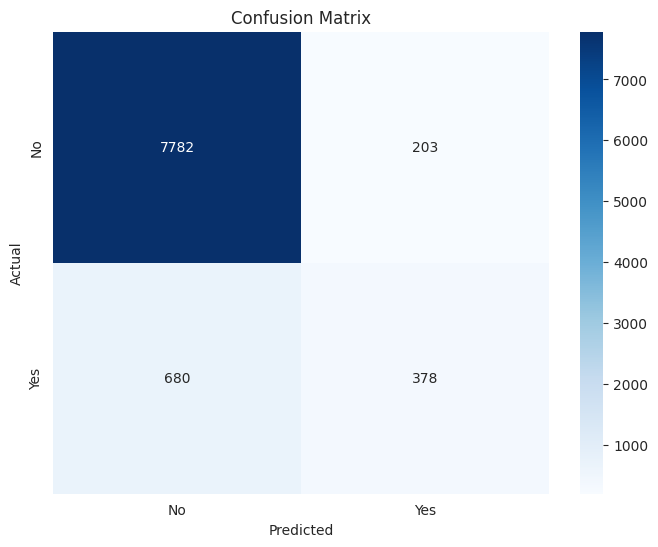


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7985
           1       0.65      0.36      0.46      1058

    accuracy                           0.90      9043
   macro avg       0.79      0.67      0.70      9043
weighted avg       0.89      0.90      0.89      9043


ROC-AUC Score: 0.9066


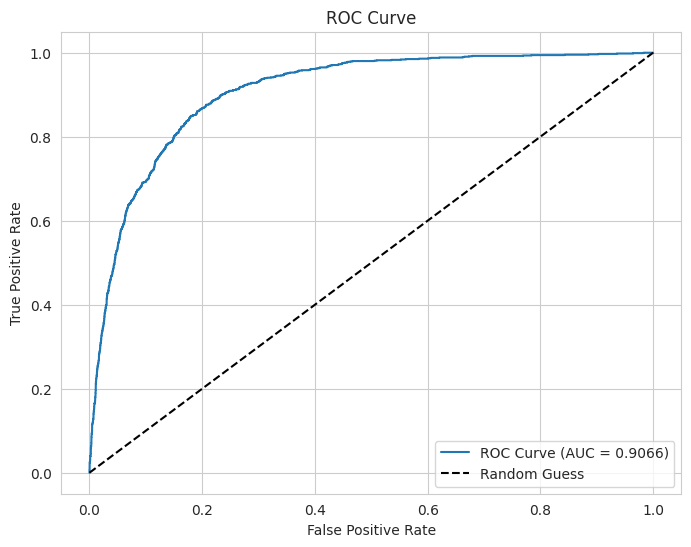


precision - recall curve graph:


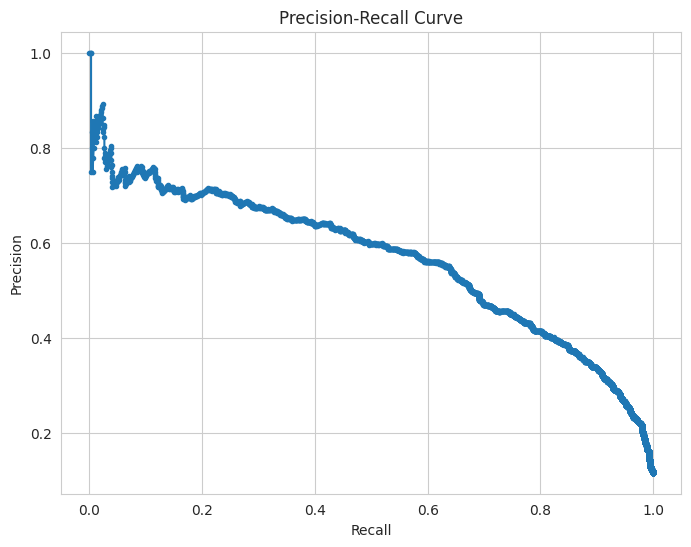

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test data
y_pred = model.predict(X_test)  # predicts 1 or 0
y_prob = model.predict_proba(X_test)[:, 1] # Get the raw probability for each class

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Classification Report (includes Precision, Recall, F1-score)
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"\nROC-AUC Score: {roc_auc:.4f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


# Get precision, recall, and thresholds for the tuned model
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Plot the precision-recall curve
print("\nprecision - recall curve graph:")
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

# You can also find the threshold that gives a specific precision or recall
# For example, find the threshold that gives a precision of 0.8
# threshold_for_precision_80 = thresholds[precision >= 0.8][-1]
# print(f"Threshold for 80% Precision: {threshold_for_precision_80:.4f}")

# Or find the threshold that gives a recall of 0.5
# threshold_for_recall_50 = thresholds[recall >= 0.5][0]
# print(f"Threshold for 50% Recall: {threshold_for_recall_50:.4f}")

In [43]:
# for aiming to improve campaign efficiency by 50%, lets keep precision to 0.5 and determine the new threshold.

target_precision = 0.50
# target_precision = 0.66

# Find the first index where precision is >= our target
# We take the first one because it will have the highest recall
try:
    threshold_index = np.where(precision >= target_precision)[0][0]

    # Get the threshold, precision, and recall at that index
    # Note: thresholds array is one element shorter, so we use the index directly on it
    # and the same index for precision/recall arrays (as they align with thresholds start)
    final_threshold = thresholds[threshold_index]
    final_precision = precision[threshold_index]
    final_recall = recall[threshold_index]

    print(f"Target Precision: >= {target_precision}")
    print("--- Found Optimal Threshold ---")
    print(f"Threshold: {final_threshold:.4f}")
    print(f"Precision at this threshold: {final_precision:.4f}")
    print(f"Recall at this threshold: {final_recall:.4f}")

except IndexError:
    print(f"Could not find a threshold that achieves at least {target_precision*100}% precision.")



Target Precision: >= 0.5
--- Found Optimal Threshold ---
Threshold: 0.2334
Precision at this threshold: 0.5000
Recall at this threshold: 0.6786


# Summary of the Process

## Data Loading
- Successfully downloaded the zip file and loaded the `bank-full.csv` data into a pandas DataFrame.

## Initial Data Exploration
- Examined the head and info of the DataFrame to understand the data structure and identify numerical and categorical columns.
- Checked for outliers and visualized the distributions of numerical features, observing skewness in several columns.

## Feature Engineering
- Created a new binary feature `Was_Contacted_Previously` from the `pdays` column.
- Converted binary categorical columns (`default`, `housing`, `loan`, `y`) to numerical (0 and 1).
- Applied sine and cosine transformations to the `day` column to capture its cyclical nature and then dropped the original `day` column.
- Applied Yeo-Johnson transformation to the `balance` column to handle its skewness and negative values.
- Applied log1p transformation to other highly skewed columns (`duration`, `campaign`, `previous`) and created new columns (`_Log`).
- Created a log-transformed version of `pdays` for contacted customers (`Days_Since_Contact_Log`).
- Performed one-hot encoding on the remaining categorical columns (`job`, `marital`, `education`, `contact`, `month`, `poutcome`).

## Data Splitting
- Split the data into training and testing sets (`X_train`, `X_test`, `y_train`, `y_test`) to ensure proper model evaluation and prevent data leakage.

## Feature Scaling
- Applied `StandardScaler` to the numerical features (including the newly created and transformed ones) in both the training and testing sets after fitting the scaler only on the training data.
- Dropped the original numerical columns that were transformed.

## Correlation Analysis
- Visualized the correlation matrix of your features using a heatmap to identify potential multicollinearity.

## Model Training
- Trained a Logistic Regression model on the preprocessed training data (`X_train`, `y_train`).

## Model Evaluation
- Evaluated the model's performance on the test set (`X_test`, `y_test`) using various metrics:
  - Accuracy: 0.9024
  - Confusion Matrix:
    - True Negatives (TN): 7782
    - False Positives (FP): 203
    - False Negatives (FN): 680
    - True Positives (TP): 378
  - Classification Report:
    - Precision (for class 1 - Yes): 0.65
    - Recall (for class 1 - Yes): 0.36
    - F1-score (for class 1 - Yes): 0.46
    - Precision (for class 0 - No): 0.92
    - Recall (for class 0 - No): 0.97
    - F1-score (for class 0 - No): 0.95
  - ROC-AUC Score: 0.9066
- Precision-Recall Curve:
  - Plotted the curve to visualize the trade-off between precision and recall at different thresholds.
- Custom Threshold Analysis:
  - Explored how to find thresholds corresponding to specific precision or recall values using the precision-recall curve outputs.
  - Found that a precision of 0.5 corresponds to a recall of approximately 0.6786 with a threshold of 0.2334.

## Assessment of the Model
- The model seems decent, but interpretation depends on the project goals.
- Overall Accuracy (0.9024):
  - The model correctly classifies about 90.24% of test instances.
  - Dataset class imbalance (many more 'no' than 'yes' responses) affects this.
- Confusion Matrix:
  - Very good at predicting negative class (7782 TNs, 203 FPs).
  - Struggles with predicting positive class (378 TPs, 680 FNs).
- Precision and Recall for Positive Class (1):
  - Precision (0.65): Correct 65% of the times when predicting subscription ('Yes').
  - Recall (0.36): Identifies only 36% of actual subscribers; many potential customers missed.
- ROC-AUC Score (0.9066):
  - Indicates strong ability to distinguish between positive and negative classes.

## Conclusion
- Logistic Regression shows good overall accuracy and strong AUC.
- Low recall for positive class is a common challenge in imbalanced datasets.
- Depending on business objectives, you might want to increase recall (accepting some precision loss).
- Precision-recall curve and custom threshold selection help in this trade-off.
- Completed a thorough process: data preparation, modeling, and initial evaluation.

